<a href="https://colab.research.google.com/github/PKpacheco/supervised_ml_assignment/blob/main/RRC_supervised_ML_Paola_Katherine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Machine Learning
#### Paola Katherine Pacheco
#### Hockey Analysis using NHL data

# Summary

This dataset comes from the official NHL page and shows the player information that we will use as features:

- Position
- Height
- Weight
- Total games played
- Total of points
- Total Assists
- Total of goals

The idea of this work is to answer the main question and predict a player's total points based on the relationship between weight and height.

**Does the relationship between weight and height influence a player's total points?**



The steps will be:
- Data cleaning and selection of which features will be used to achieve the final result.
- Apply the SVM algorithm, which will work to generate our answer, as we need a regression algorithm that allows us to have an input of more than 1 variable.
- Our last step will be to evaluate the accuracy of the model, and document our output

### Goal

The objective is to predict according to weight, height and position the total range of points that a player could reach.
This model can be used for NHL hiring and comparison purposes.

# Cleaning and organize data

In [21]:
# NHL Dataset
# NHL Data 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [22]:
#read bio info csv
bio_info_url ="/content/drive/MyDrive/rrc/supervised_ml/bio_info_nhl.csv"
df= pd.read_csv(bio_info_url, encoding = "utf-8")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      1000 non-null   object
 1   S/C         1000 non-null   object
 2   Pos         1000 non-null   object
 3   DOB         1000 non-null   object
 4   Birth City  1000 non-null   object
 5   S/P         1000 non-null   object
 6   Ctry        1000 non-null   object
 7   Ntnlty      1000 non-null   object
 8   Ht          1000 non-null   object
 9   Wt          1000 non-null   object
 10  Draft Yr    1000 non-null   object
 11  Round       1000 non-null   object
 12  Overall     1000 non-null   object
 13  1st Season  1000 non-null   int64 
 14  HOF         1000 non-null   object
 15  GP          1000 non-null   object
 16  G           1000 non-null   int64 
 17  A           1000 non-null   object
 18  P           1000 non-null   object
dtypes: int64(2), object(17)
memory usage: 148.6+ KB


In [24]:
df.head()

,Player,S/C,Pos,DOB,Birth City,S/P,Ctry,Ntnlty,Ht,Wt,Draft Yr,Round,Overall,1st Season,HOF,GP,G,A,P
0,Glenn Anderson,L,R,1960-10-02,Vancouver,BC,CAN,CAN,73,190,1979,4,69,19801981,Y,"1,129",498,601,"1,099"
1,George Armstrong,R,R,1930-07-06,Skead,ON,CAN,CAN,73,184,--,--,--,19491950,Y,59,7,18,25
2,Dave Andreychuk,R,L,1963-09-29,Hamilton,ON,CAN,CAN,76,225,1982,1,16,19821983,Y,"1,639",640,698,"1,338"
3,Andy Bathgate,R,R,1932-08-28,Winnipeg,MB,CAN,CAN,72,180,--,--,--,19521953,Y,76,15,29,44
4,Johnny Bucyk,L,L,1935-05-12,Edmonton,AB,CAN,CAN,72,215,--,--,--,19551956,Y,567,244,348,592


In [25]:
df = df.rename(columns={
    "Player": "player",
    "S/C": "skater_shoots_goalie_catches",
    "Birth City": "birth_city",
    "S/P": "state_province",
    "Pos": "position",
    "Ht": "height", 
    "Wt": "weight", 
    "HOF": "hall_fame", 
    "Draft Yr": "draft_year",
    "1st Season": "first_season",
    "GP": "games_played", 
    "G": "Goal",
    "A": "assist",
    "P": "points"
    })
df.head()

,player,skater_shoots_goalie_catches,position,DOB,birth_city,state_province,Ctry,Ntnlty,height,weight,draft_year,Round,Overall,first_season,hall_fame,games_played,Goal,assist,points
0,Glenn Anderson,L,R,1960-10-02,Vancouver,BC,CAN,CAN,73,190,1979,4,69,19801981,Y,"1,129",498,601,"1,099"
1,George Armstrong,R,R,1930-07-06,Skead,ON,CAN,CAN,73,184,--,--,--,19491950,Y,59,7,18,25
2,Dave Andreychuk,R,L,1963-09-29,Hamilton,ON,CAN,CAN,76,225,1982,1,16,19821983,Y,"1,639",640,698,"1,338"
3,Andy Bathgate,R,R,1932-08-28,Winnipeg,MB,CAN,CAN,72,180,--,--,--,19521953,Y,76,15,29,44
4,Johnny Bucyk,L,L,1935-05-12,Edmonton,AB,CAN,CAN,72,215,--,--,--,19551956,Y,567,244,348,592


The positions we found are:


*   Left Wing
*   Right Wing 
*   Center
*   Defensemen

We  need to consider that depending on the position of each player, their total points should vary. A defensemen will definitely have less points since his position is not responsible for shoots

In [26]:
# list all positions
df['position'].unique()

array(['R', 'L', 'C', 'D'], dtype=object)

## Remove data with no influence on the output


Let's remove fields that we will not use as features because they have no influence on the total points:
* Natinalty
* State province
* Round
* Country
* Draft Year
* Hall of fame
* Overall
* Date of Birth
* birth city
* first season

In [27]:
'''remove unecessay data, Natinalty, State province, Round, Country, draft year, 
  hall of fame, overall,date of birth, birth city, first season '''

 
df.drop([
    'Ntnlty',
    'state_province',
    'Round', 
    'Ctry', 
    'draft_year', 
    'hall_fame', 
    'Overall', 
    'DOB', 
    'birth_city', 
    'first_season'
    ], axis=1, inplace=True)


In [28]:
df.tail()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points
995,Ray Maluta,L,D,68,173,25,2,3,5
996,Ken Mann,R,R,71,200,1,0,0,0
997,Brian Marchinko,R,C,72,180,47,2,6,8
998,Gilles Marotte,L,D,69,205,477,36,171,207
999,Donnie Marshall,L,L,70,160,112,22,43,65


## Organize the data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   player                        1000 non-null   object
 1   skater_shoots_goalie_catches  1000 non-null   object
 2   position                      1000 non-null   object
 3   height                        1000 non-null   object
 4   weight                        1000 non-null   object
 5   games_played                  1000 non-null   object
 6   Goal                          1000 non-null   int64 
 7   assist                        1000 non-null   object
 8   points                        1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


We have columns ( weight, height, assist, points) that should have as value , int64 ,but they are as object. \
We need to treat and modify these data\
for all the object columns we change to string

In [30]:
# convert points to a integer
df['points'] = df['points'].str.replace(',', '').astype(float)
df['points'] = df['points'].astype(int)
df.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points
0,Glenn Anderson,L,R,73,190,"1,129",498,601,1099
1,George Armstrong,R,R,73,184,59,7,18,25
2,Dave Andreychuk,R,L,76,225,"1,639",640,698,1338
3,Andy Bathgate,R,R,72,180,76,15,29,44
4,Johnny Bucyk,L,L,72,215,567,244,348,592


In [31]:
# convert assist to a integer

df['assist'] = df['assist'].str.replace(',', '').astype(float)
df['assist']  = df['assist'].astype(int)
df.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points
0,Glenn Anderson,L,R,73,190,"1,129",498,601,1099
1,George Armstrong,R,R,73,184,59,7,18,25
2,Dave Andreychuk,R,L,76,225,"1,639",640,698,1338
3,Andy Bathgate,R,R,72,180,76,15,29,44
4,Johnny Bucyk,L,L,72,215,567,244,348,592


In [32]:
# convert games_played to a integer

df['games_played'] = df['games_played'].str.replace(',', '').astype(float)
df['games_played'] = df['games_played'].astype(int)
df.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points
0,Glenn Anderson,L,R,73,190,1129,498,601,1099
1,George Armstrong,R,R,73,184,59,7,18,25
2,Dave Andreychuk,R,L,76,225,1639,640,698,1338
3,Andy Bathgate,R,R,72,180,76,15,29,44
4,Johnny Bucyk,L,L,72,215,567,244,348,592


In [33]:
# convert weight to a integer and remove rows with non int values
df.drop(df[df.weight == '--'].index, inplace=True)


df['weight'] = df['weight'].str.replace(',', '').astype(float)
df['weight'] =df['weight'].astype(int)
df.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points
0,Glenn Anderson,L,R,73,190,1129,498,601,1099
1,George Armstrong,R,R,73,184,59,7,18,25
2,Dave Andreychuk,R,L,76,225,1639,640,698,1338
3,Andy Bathgate,R,R,72,180,76,15,29,44
4,Johnny Bucyk,L,L,72,215,567,244,348,592


In [34]:
# convert height to a integer and remove rows with non int values
df.drop(df[df.height == '--'].index, inplace=True)

df['height'] = df['height'].str.replace(',', '').astype(float)
df['height'] = df['height'].astype(int)
df.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points
0,Glenn Anderson,L,R,73,190,1129,498,601,1099
1,George Armstrong,R,R,73,184,59,7,18,25
2,Dave Andreychuk,R,L,76,225,1639,640,698,1338
3,Andy Bathgate,R,R,72,180,76,15,29,44
4,Johnny Bucyk,L,L,72,215,567,244,348,592


In [35]:
# convert object to string for easy operations

df['player'] = df['player'].astype('string')
df['skater_shoots_goalie_catches'] = df['skater_shoots_goalie_catches'].astype('string')
df['position'] = df['position'].astype('string')
df.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points
0,Glenn Anderson,L,R,73,190,1129,498,601,1099
1,George Armstrong,R,R,73,184,59,7,18,25
2,Dave Andreychuk,R,L,76,225,1639,640,698,1338
3,Andy Bathgate,R,R,72,180,76,15,29,44
4,Johnny Bucyk,L,L,72,215,567,244,348,592


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   player                        999 non-null    string
 1   skater_shoots_goalie_catches  999 non-null    string
 2   position                      999 non-null    string
 3   height                        999 non-null    int64 
 4   weight                        999 non-null    int64 
 5   games_played                  999 non-null    int64 
 6   Goal                          999 non-null    int64 
 7   assist                        999 non-null    int64 
 8   points                        999 non-null    int64 
dtypes: int64(6), string(3)
memory usage: 110.3 KB


We need to relate the total of goals, assists and points by the amount of games played

In [37]:
df.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points
0,Glenn Anderson,L,R,73,190,1129,498,601,1099
1,George Armstrong,R,R,73,184,59,7,18,25
2,Dave Andreychuk,R,L,76,225,1639,640,698,1338
3,Andy Bathgate,R,R,72,180,76,15,29,44
4,Johnny Bucyk,L,L,72,215,567,244,348,592


In [38]:
# new variable total of goal, assists and points

df['points_per_game'] = df['points'] / df['games_played']
df.head() 

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points,points_per_game
0,Glenn Anderson,L,R,73,190,1129,498,601,1099,0.973428
1,George Armstrong,R,R,73,184,59,7,18,25,0.423729
2,Dave Andreychuk,R,L,76,225,1639,640,698,1338,0.816351
3,Andy Bathgate,R,R,72,180,76,15,29,44,0.578947
4,Johnny Bucyk,L,L,72,215,567,244,348,592,1.044092


In [39]:
# create new variable bmi (body mass index)

df['bmi'] = (df['weight']/(df['height']**2)* 703)
df.tail()


,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points,points_per_game,bmi
995,Ray Maluta,L,D,68,173,25,2,3,5,0.200000,26.301687
996,Ken Mann,R,R,71,200,1,0,0,0,0.000000,27.891291
997,Brian Marchinko,R,C,72,180,47,2,6,8,0.170213,24.409722
998,Gilles Marotte,L,D,69,205,477,36,171,207,0.433962,30.269901
999,Donnie Marshall,L,L,70,160,112,22,43,65,0.580357,22.955102


In [40]:
df['position'].unique()

<StringArray>
['R', 'L', 'C', 'D']
Length: 4, dtype: string

# Plot Data

## Relation between BMI and Total Points

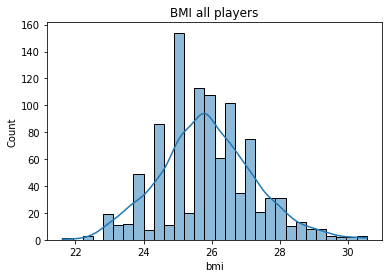

In [41]:
ax = sns.histplot(data = df, x = 'bmi', kde = True)
ax.set_title("BMI all players")
plt.show()

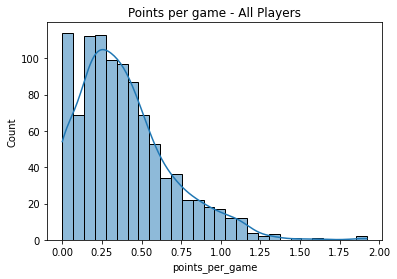

In [42]:
ax = sns.histplot(data = df, x = 'points_per_game', kde = True)
ax.set_title("Points per game - All Players")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d39200b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d3920e220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d392007c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d3920e8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d3920ebe0>],
 'means': []}

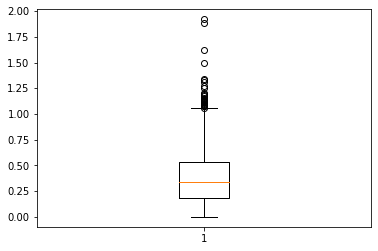

In [43]:
# we can see that most of players have between 0.25 and 0.5 points per game. 
plt.boxplot(df['points_per_game'])

## Relation between BMI and Points per player position

In [45]:
# create table for each position

df['position'].unique() #['R', 'L', 'C', 'D']

position_right_wing = (df["position"]=='R')
df_right_wing = df[position_right_wing]

position_left_wing = (df["position"]=='L') 
df_left_wing = df[position_left_wing]

position_center = (df["position"]=='C') 
df_center = df[position_center]

position_defensemen = (df["position"]=='D') 
df_defensemen  = df[position_defensemen]

In [46]:
df_right_wing.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points,points_per_game,bmi
0,Glenn Anderson,L,R,73,190,1129,498,601,1099,0.973428,25.064740
1,George Armstrong,R,R,73,184,59,7,18,25,0.423729,24.273222
3,Andy Bathgate,R,R,72,180,76,15,29,44,0.578947,24.409722
8,Mike Bossy,R,R,72,186,752,573,553,1126,1.497340,25.223380
14,Dino Ciccarelli,R,R,70,185,1232,608,592,1200,0.974026,26.541837


In [47]:
df_left_wing.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points,points_per_game,bmi
2,Dave Andreychuk,R,L,76,225,1639,640,698,1338,0.816351,27.384868
4,Johnny Bucyk,L,L,72,215,567,244,348,592,1.044092,29.156057
5,Bill Barber,L,L,72,195,903,420,463,883,0.977852,26.443866
11,Dick Duff,L,L,69,166,68,10,15,25,0.367647,24.511237
26,Bob Gainey,L,L,74,200,1160,239,262,501,0.431897,25.675676


In [48]:
df_center.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points,points_per_game,bmi
6,Jean Beliveau,L,C,75,205,70,25,51,76,1.085714,25.620444
10,Alex Delvecchio,L,C,72,195,240,60,136,196,0.816667,26.443866
12,Guy Carbonneau,R,C,71,186,1318,260,403,663,0.503035,25.938901
15,Bobby Clarke,L,C,70,185,1068,343,821,1164,1.089888,26.541837
18,Marcel Dionne,R,C,69,190,1348,731,1040,1771,1.313798,28.055030


In [49]:
df_defensemen.head()

,player,skater_shoots_goalie_catches,position,height,weight,games_played,Goal,assist,points,points_per_game,bmi
7,Rob Blake,R,D,76,220,1270,240,537,777,0.611811,26.776316
9,Ray Bourque,L,D,72,223,1612,410,1169,1579,0.979529,30.240934
13,Chris Chelios,R,D,72,191,1651,185,763,948,0.574197,25.901427
16,Paul Coffey,L,D,72,205,1409,396,1135,1531,1.086586,27.799961
21,Viacheslav Fetisov,L,D,73,215,546,36,192,228,0.417582,28.362732


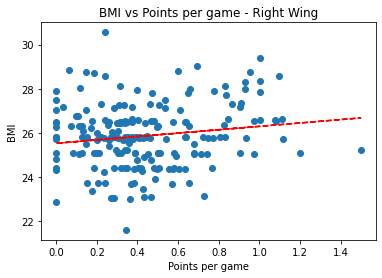

In [68]:
# plot relation between point per position and BMI
x = df_right_wing['points_per_game']
y = df_right_wing['bmi']

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("BMI vs Points per game - Right Wing")
plt.ylabel("BMI")
plt.xlabel("Points per game")
plt.show()

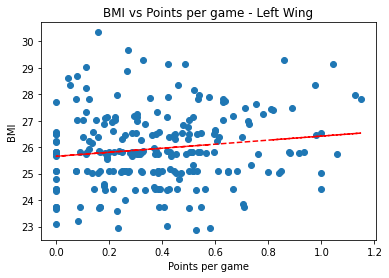

In [69]:
# plot relation between point per position and BMI
x = df_left_wing['points_per_game']
y = df_left_wing['bmi']

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("BMI vs Points per game - Left Wing")
plt.ylabel("BMI")
plt.xlabel("Points per game")
plt.show()

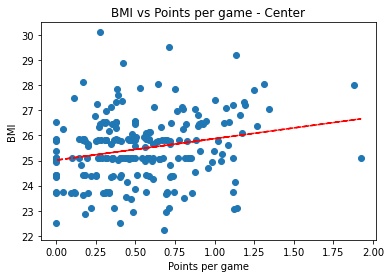

In [70]:
# plot relation between point per position and BMI
x = df_center['points_per_game']
y = df_center['bmi']

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("BMI vs Points per game - Center")
plt.ylabel("BMI")
plt.xlabel("Points per game")
plt.show()

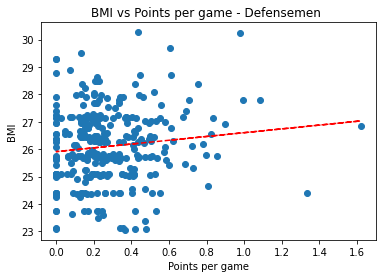

In [71]:
# plot relation between point per position and BMI
x = df_defensemen['points_per_game']
y = df_defensemen['bmi']

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("BMI vs Points per game - Defensemen ")
plt.ylabel("BMI")
plt.xlabel("Points per game")
plt.show()

## AVG and Metrics by position

In [82]:
avg_defensemen_w = df_defensemen['weight'].mean()
avg_defensemen_h = df_defensemen['height'].mean()
avg_defensemen_bmi = df_defensemen['bmi'].mean()
avg_defensemen_ppg= df_defensemen['points_per_game'].mean()


print ('AVG weight for defensemen:',avg_defensemen_w,  '\n'
       'AVG height for defensemen:', avg_defensemen_h, '\n'
       'AVG BMI for defensemen:', avg_defensemen_bmi,  '\n'
       'AVG Points per Game for defensemen:', avg_defensemen_ppg

       )


AVG weight for defensemen: 195.97222222222223 
AVG height for defensemen: 72.64197530864197 
AVG BMI for defensemen: 26.102261604015506 
AVG Points per Game for defensemen: 0.2754878346239619


In [83]:
avg_center_w = df_center['weight'].mean()
avg_center_h = df_center['height'].mean()
avg_center_bmi = df_center['bmi'].mean()
avg_center_ppg= df_center['points_per_game'].mean()


print ('AVG weight for center:',avg_center_w,  '\n'
       'AVG height for center:', avg_center_h, '\n'
       'AVG BMI for center :', avg_center_bmi, '\n'
       'AVG Points per Game for center:', avg_center_ppg
       )


AVG weight for center: 184.10212765957448 
AVG height for center: 71.27659574468085 
AVG BMI for center : 25.460038516229147 
AVG Points per Game for center: 0.5209776526749132


In [84]:
avg_left_wing_w = df_left_wing['weight'].mean()
avg_left_wing_h = df_left_wing['height'].mean()
avg_left_wing_bmi = df_left_wing['bmi'].mean()
avg_left_wing_ppg= df_left_wing['points_per_game'].mean()


print ('AVG weight for left wing:',avg_left_wing_w,  '\n'
       'AVG height for left wing:', avg_left_wing_h, '\n'
       'AVG BMI for left wing:', avg_left_wing_bmi,  '\n'
       'AVG Points per Game for left wing:', avg_left_wing_ppg
)


AVG weight for left wing: 190.75105485232066 
AVG height for left wing: 71.88185654008439 
AVG BMI for left wing: 25.938828314379457 
AVG Points per Game for left wing: 0.3747452799203224


In [85]:
avg_right_wing_w = df_right_wing['weight'].mean()
avg_right_wing_h = df_right_wing['height'].mean()
avg_right_wing_bmi = df_right_wing['bmi'].mean()
avg_right_wing_ppg= df_right_wing['points_per_game'].mean()


print ('AVG weight for right wing:',avg_right_wing_w,  '\n'
       'AVG height for right wing:', avg_right_wing_h, '\n'
       'AVG BMI for right wing:', avg_right_wing_bmi,  '\n'
       'AVG Points per Game for right wing:', avg_right_wing_ppg

      )


AVG weight for right wing: 187.89655172413794 
AVG height for right wing: 71.44827586206897 
AVG BMI for right wing: 25.86863835371995 
AVG Points per Game for right wing: 0.4348740958991085


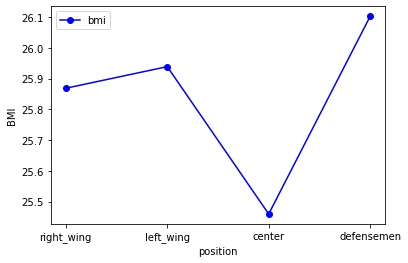

In [105]:
# bmi plot
label = ['right_wing',
         'left_wing',
         'center',
         'defensemen'
         ]

bmi = [
    avg_right_wing_bmi, 
    avg_left_wing_bmi,
    avg_center_bmi,
    avg_defensemen_bmi
          ]

plt.plot(label, bmi, color="blue", marker="o", label="bmi")

plt.xticks(range(0,4))
plt.ylabel("BMI")
plt.xlabel("position")

plt.legend()
plt.show() 


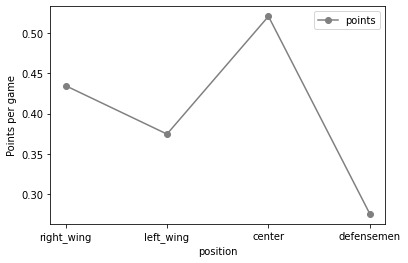

In [111]:
# points plot
label = ['right_wing',
         'left_wing',
         'center',
         'defensemen'
         ]

points = [avg_right_wing_ppg, 
          avg_left_wing_ppg,
          avg_center_ppg,
          avg_defensemen_ppg
          ]

plt.plot(label, points, color="grey", marker="o", label="points")

plt.xticks(range(0,4))
plt.ylabel("Points per game")
plt.xlabel("position")

plt.legend()
plt.show() 


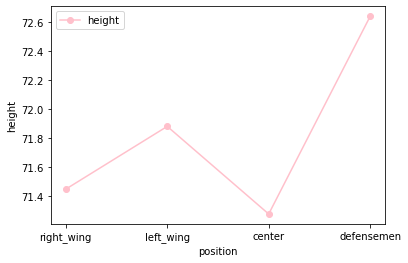

In [112]:
# points plot
label = ['right_wing',
         'left_wing',
         'center',
         'defensemen'
         ]

height = [avg_right_wing_h, 
          avg_left_wing_h,
          avg_center_h,
          avg_defensemen_h
          ]

plt.plot(label, height, color="pink", marker="o", label="height")

plt.xticks(range(0,4))
plt.ylabel("height")
plt.xlabel("position")

plt.legend()
plt.show() 

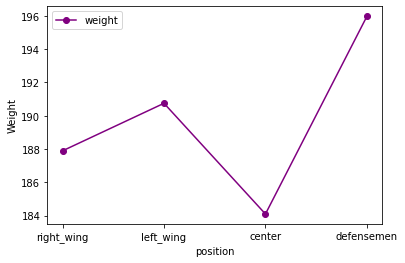

In [113]:
# points plot
label = ['right_wing',
         'left_wing',
         'center',
         'defensemen'
         ]

weight = [avg_right_wing_w, 
          avg_left_wing_w,
          avg_center_w,
          avg_defensemen_w
          ]

plt.plot(label, weight, color="purple", marker="o", label="weight")

plt.xticks(range(0,4))
plt.ylabel("Weight")
plt.xlabel("position")

plt.legend()
plt.show() 


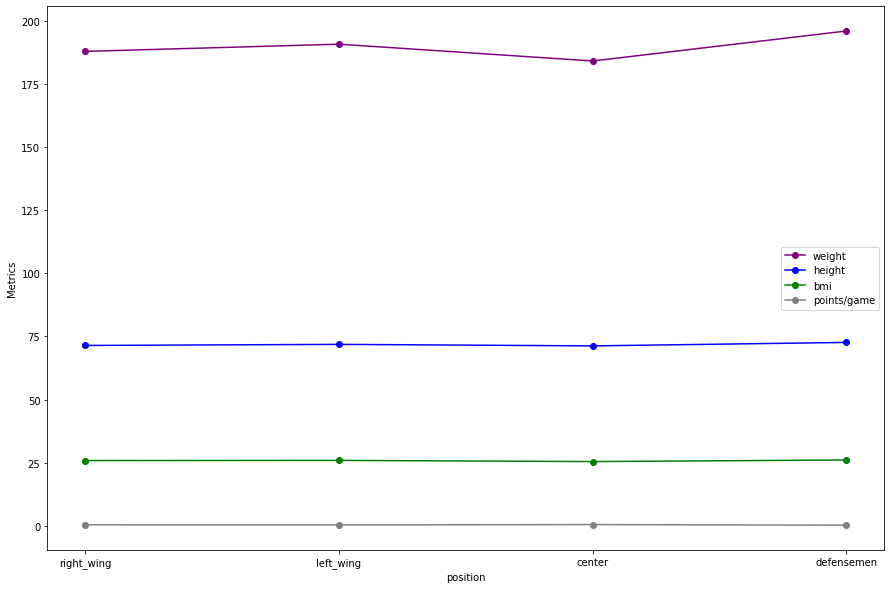

In [114]:

label = ['right_wing',
         'left_wing',
         'center',
         'defensemen'
         ]


weight = [avg_right_wing_w, 
          avg_left_wing_w,
          avg_center_w,
          avg_defensemen_w
          ]

height = [avg_right_wing_h, 
          avg_left_wing_h,
          avg_center_h,
          avg_defensemen_h
          ]

bmi = [avg_right_wing_bmi, 
       avg_left_wing_bmi,
       avg_center_bmi,
       avg_defensemen_bmi
       ]

ppg = [avg_right_wing_ppg, 
       avg_left_wing_ppg,
       avg_center_ppg,
       avg_defensemen_ppg
       ]

plt.figure(figsize=(15, 10))

plt.plot(label, weight, color="purple", marker="o", label="weight")
plt.plot(label, height, color="blue", marker="o", label="height")
plt.plot(label, bmi, color="green", marker="o", label="bmi")
plt.plot(label, ppg, color="grey", marker="o", label="points/game")

plt.xticks(range(0,4))

plt.ylabel("Metrics")

plt.xlabel("position")

plt.legend()
plt.show() 
